In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob
import re
from datetime import datetime

data = pd.read_csv('burgers.csv')
data['As Of Date'] = pd.to_datetime(data['As Of Date'], format = "%m/%d/%Y %H:%M")

In [2]:
data

,Ticker Symbol,Entity Name,Unique ID,As Of Date,Username,Checkins,Has App,Were Here Count,Likes,Talking About Count,Facebook Id,Date Added,Date Updated,Ticker Sector,Ticker Industry
0,nasdaq:jack,4.689535e+10,38467057,2018-06-25,jackinthebox,746,False,2560250,1315903,4837,4.689535e+10,6/26/2018 1:28,6/26/2018 1:28,Consumer Services,Travel & Leisure
1,nyse:mcd,5.024557e+10,38467785,2018-06-25,McDonaldsUS,13,False,31762740,77810785,30040,5.024557e+10,6/26/2018 1:33,6/26/2018 1:33,Consumer Services,Travel & Leisure
2,nyse:mcd,4.842321e+10,38467784,2018-06-25,rmhcglobal,223,False,359204,1006170,910,4.842321e+10,6/26/2018 1:33,6/26/2018 1:33,Consumer Services,Travel & Leisure
3,nasdaq:wen,1.133850e+11,38467320,2018-06-25,wendys,51316,False,3412448,8550456,12927,1.133850e+11,6/26/2018 1:30,6/26/2018 1:30,Consumer Services,Travel & Leisure
4,nasdaq:sonc,2.454096e+10,38466059,2018-06-25,sonicdrivein,61019,False,3819776,4644992,57137,2.454096e+10,6/25/2018 1:46,6/25/2018 1:46,Consumer Services,Travel & Leisure
5,nyse:mcd,1.015010e+16,38462907,2018-06-15,McDonalds,0,False,31659447,77666982,5824,1.015010e+16,6/15/2018 18:50,6/15/2018 18:50,Consumer Services,Travel & Leisure
6,nyse:qsr,1.346150e+14,38463225,2018-06-14,burgerking,0,False,2955399,8221757,702439,1.346150e+14,6/15/2018 18:51,6/15/2018 18:51,NaN,Food Producers
7,nyse:mcd,1.434420e+15,38462908,2018-06-14,McDonaldsLatino,0,False,0,277089,1046,1.434420e+15,6/15/2018 18:50,6/15/2018 18:50,Consumer Services,Travel & Leisure
8,nyse:qsr,2.353590e+14,38463226,2018-06-14,TimHortonsUS,0,False,721778,3184006,945,2.353590e+14,6/15/2018 18:51,6/15/2018 18:51,NaN,Food Producers
9,nyse:mcd,4.842321e+10,38458713,2018-06-13,rmhcglobal,223,False,357286,1003749,1038,4.842321e+10,6/13/2018 18:56,6/13/2018 18:56,Consumer Services,Travel & Leisure


In [3]:
data.describe()

,Entity Name,Unique ID,Checkins,Were Here Count,Likes,Talking About Count,Facebook Id
count,8.589000e+03,8.589000e+03,8589.000000,8.589000e+03,8.589000e+03,8589.000000,8.589000e+03
mean,1.265048e+15,6.894868e+06,9537.046804,6.676796e+06,1.769717e+07,40096.018046,1.265048e+15
std,3.086942e+15,9.919752e+06,19216.115302,1.001579e+07,2.716582e+07,66540.098180,3.086942e+15
min,2.454096e+10,2.484300e+04,0.000000,0.000000e+00,2.043620e+05,0.000000,2.454096e+10
25%,4.842321e+10,1.031888e+06,0.000000,3.346420e+05,1.202647e+06,5191.000000,4.842321e+10
50%,1.133850e+11,2.177282e+06,13.000000,2.341551e+06,4.334136e+06,13809.000000,1.133850e+11
75%,2.353590e+14,6.914169e+06,606.000000,3.428667e+06,8.426978e+06,47653.000000,2.353590e+14
max,1.015010e+16,3.846778e+07,61552.000000,3.176274e+07,7.781078e+07,869485.000000,1.015010e+16


In [4]:
data['Ticker Symbol'].unique()

array(['nasdaq:jack', 'nyse:mcd', 'nasdaq:wen', 'nasdaq:sonc', 'nyse:qsr'], dtype=object)

In [5]:
data['Username'].unique()

array(['jackinthebox', 'McDonaldsUS', 'rmhcglobal', 'wendys',
       'sonicdrivein', 'McDonalds', 'burgerking', 'McDonaldsLatino',
       'TimHortonsUS'], dtype=object)

Tickers and associated Usernames:
* 'nasdaq:jack' - Jack in the Box (jackinthebox)
* 'nyse:mcd' - McDonalds (McDonaldsUS, McDonalds, McDonaldsLatino, rmhcglobal)
* 'nasdaq:wen' - Wendys (wendys)
* 'nasdaq:sonc' - Sonic Corp. (sonicdrivein)
* 'nyse:qsr' - Restaurant Group (burgerking, TimHortonsUS)

Were Here Count: cumulative

Likes: cumulative

Talking About Count: additive



# Likes Over Time

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig1, f1_axes = plt.subplots(ncols=2, nrows=4,figsize=(18,18))
fig1.suptitle('Facebook Likes Over Time')

plt.subplot(4, 2, 1)
plt.title('Jack in the Box')
df_jack = data[data['Username']=='jackinthebox']
plt.plot(df_jack['As Of Date'],df_jack['Likes'])

plt.subplot(4, 2, 2)
plt.title('Wendys')
df_wendys = data[data['Username']=='wendys']
plt.plot(df_wendys['As Of Date'],df_wendys['Likes'])

plt.subplot(4, 2, 3)
plt.title('McDonalds US')
df_mcd_us = data[data['Username']=='McDonaldsUS']
plt.plot(df_mcd_us['As Of Date'],df_mcd_us['Likes'])
f1_axes.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.subplot(4, 2, 4)
plt.title('McDonalds Latino')
df_mcd_lat = data[data['Username']=='McDonaldsLatino']
plt.plot(df_mcd_lat['As Of Date'],df_mcd_lat['Likes'])

plt.subplot(4, 2, 5)
plt.title('Sonic')
df_sonic = data[data['Username']=='sonicdrivein']
plt.plot(df_sonic['As Of Date'],df_sonic['Likes'])

plt.subplot(4, 2, 6)
plt.title('Burger King')
df_bk = data[data['Username']=='burgerking']
plt.plot(df_bk['As Of Date'],df_bk['Likes'])

plt.subplot(4, 2, 7)
plt.title('Tim Hortons US')
df_tim = data[data['Username']=='TimHortonsUS']
plt.plot(df_tim['As Of Date'],df_tim['Likes'])

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'get_yaxis'

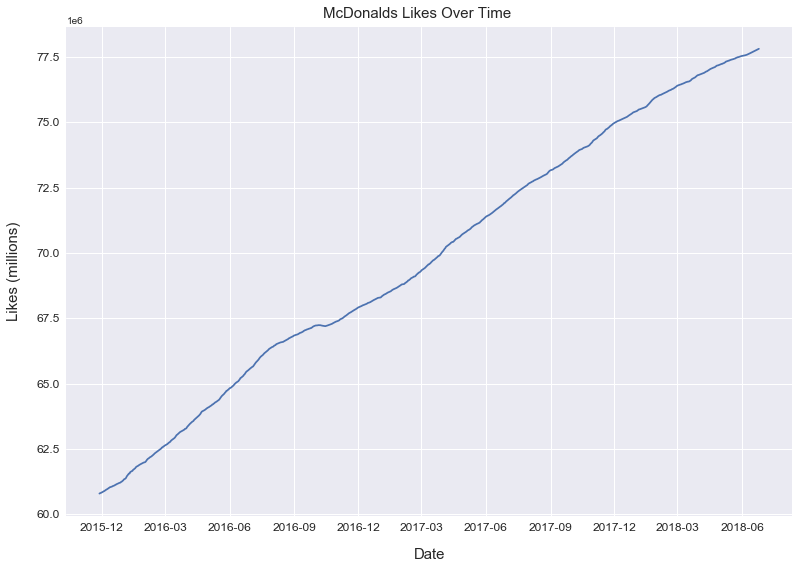

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag
#fig1.suptitle('Facebook Likes Over Time')
sns.set(style="darkgrid")
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111)
fig.suptitle('McDonalds Likes Over Time',fontsize=15,y=.91)
df_mcd_us = data[data['Username']=='McDonaldsUS']
ax.plot(df_mcd_us['As Of Date'],df_mcd_us['Likes'])
#f1_axes.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(FixedOrderFormatter(6))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Date',labelpad=15,fontsize=15)
plt.ylabel('Likes (millions)', labelpad=15,fontsize=15)
plt.show()

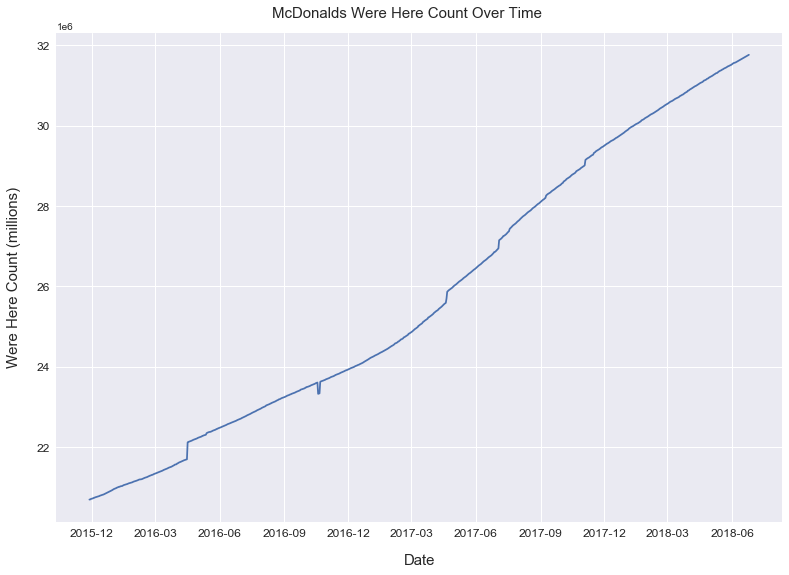

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag

sns.set(style="darkgrid")
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111)
fig.suptitle('McDonalds Were Here Count Over Time',fontsize=15,y=.92)
df_mcd_us = data[data['Username']=='McDonaldsUS']
ax.plot(df_mcd_us['As Of Date'],df_mcd_us['Were Here Count'])
#f1_axes.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(FixedOrderFormatter(6))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Date',labelpad=15,fontsize=15)
plt.ylabel('Were Here Count (millions)', labelpad=15,fontsize=15)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag

sns.set(style="darkgrid")
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111)
fig.suptitle('McDonalds Talking About Count Over Time',fontsize=15)
df_mcd_us = data[data['Username']=='McDonaldsUS']
df_mcd_us = df_mcd_us[df_mcd_us['As Of Date']>='2018-03']
ax.plot(df_mcd_us['As Of Date'],df_mcd_us['Talking About Count'])
#f1_axes.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(FixedOrderFormatter(3))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Date',labelpad=15,fontsize=15)
plt.ylabel('Talking About Count (millions)', labelpad=15,fontsize=15)
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
fig.suptitle('Facebook Likes Over Time')

color = 'tab:red'
ax1.set_xlabel('Time (months)')
ax1.set_ylabel('Sonic', color=color)
df_sonic = data[data['Username']=='sonicdrivein']
df_sonic = df_sonic[df_sonic['As Of Date'] >= '2015-12']
ax1.plot(df_sonic['As Of Date'],df_sonic['Likes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Jack in the Box', color=color)  # we already handled the x-label with ax1
df_jack = df_jack[df_jack['As Of Date'] >= '2015-12']
ax2.plot(df_jack['As Of Date'],df_jack['Likes'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (months)')
ax1.set_ylabel('Sonic', color=color)
df_sonic = data[data['Username']=='sonicdrivein']
df_sonic = df_sonic[df_sonic['As Of Date'] >= '2015-12']
ax1.plot(df_sonic['As Of Date'],df_sonic['Likes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('McDonalds US', color=color)  # we already handled the x-label with ax1
df_mcd_us = df_mcd_us[df_mcd_us['As Of Date'] >= '2015-12']
ax2.plot(df_mcd_us['As Of Date'],df_mcd_us['Likes'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (months)')
ax1.set_ylabel('Sonic', color=color)
df_sonic = data[data['Username']=='sonicdrivein']
df_sonic = df_sonic[df_sonic['As Of Date'] >= '2015-12']
ax1.plot(df_sonic['As Of Date'],df_sonic['Likes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('McDonalds Latino', color=color)  # we already 5-09'
df_mcd_lat = df_mcd_lat[df_mcd_lat['As Of Date'] >= '2015-12']
ax2.plot(df_mcd_lat['As Of Date'],df_mcd_lat['Likes'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
fig.suptitle('Facebook Likes Over Time')
color = 'tab:red'
ax1.set_xlabel('Time (months)')
ax1.set_ylabel('Sonic', color=color)
df_sonic = data[data['Username']=='sonicdrivein']
df_sonic = df_sonic[df_sonic['As Of Date'] >= '2015-12']
ax1.plot(df_sonic['As Of Date'],df_sonic['Likes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Burger King', color=color)  # we already handled the x-label with ax1
df_bk = df_bk[df_bk['As Of Date'] >= '2015-12'] #keep
ax2.plot(df_bk['As Of Date'],df_bk['Likes'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (months)')
ax1.set_ylabel('Sonic', color=color)
df_sonic = data[data['Username']=='sonicdrivein']
df_sonic = df_sonic[df_sonic['As Of Date'] >= '2016-09']
ax1.plot(df_sonic['As Of Date'],df_sonic['Likes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Wendys', color=color)  # we already handled the x-label with ax1
df_wendys = df_wendys[df_wendys['As Of Date'] >= '2016-09'] #keep
ax2.plot(df_wendys['As Of Date'],df_wendys['Likes'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (months)')
ax1.set_ylabel('Sonic', color=color)
df_sonic = data[data['Username']=='sonicdrivein']
df_sonic = df_sonic[df_sonic['As Of Date'] >= '2016-06']
ax1.plot(df_sonic['As Of Date'],df_sonic['Likes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Tim Hortons US', color=color)  # we already handled the x-label with ax1
df_tim = df_tim[df_tim['As Of Date'] >= '2016-06'] #keep
ax2.plot(df_tim['As Of Date'],df_tim['Likes'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
df_jack = data[data['Username']=='jackinthebox']
df_jack = df_jack[df_jack['As Of Date'] > '2016-12']
df_jack

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
#ax1.set_xlabel('time (s)')
ax1.set_ylabel('Jack in the Box', color=color)
df_jack = data[data['Username']=='jackinthebox']
#df_jack = data[data['As Of Date'] > '2016-12']
ax1.plot(df_jack['As Of Date'],df_jack['Likes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Wendys', color=color)  # we already handled the x-label with ax1
ax2.plot(df_wendys['As Of Date'],df_wendys['Likes'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

plt.show()

# Were Here Count

In [ ]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=4,figsize=(18,18))
fig1.suptitle("Facebook 'Were Here Count' Over Time")

plt.subplot(4, 2, 1)
plt.title('Jack in the Box')
df_jack = data[data['Username']=='jackinthebox']
plt.plot(df_jack['As Of Date'],df_jack['Were Here Count'])

plt.subplot(4, 2, 2)
plt.title('Wendys')
df_wendys = data[data['Username']=='wendys']
plt.plot(df_wendys['As Of Date'],df_wendys['Were Here Count'])

plt.subplot(4, 2, 3)
plt.title('McDonalds US')
df_mcd_us = data[data['Username']=='McDonaldsUS']
plt.plot(df_mcd_us['As Of Date'],df_mcd_us['Were Here Count'])

plt.subplot(4, 2, 4)
plt.title('McDonalds Latino')
df_mcd_lat = data[data['Username']=='McDonaldsLatino']
plt.plot(df_mcd_lat['As Of Date'],df_mcd_lat['Were Here Count'])

plt.subplot(4, 2, 5)
plt.title('Sonic')
df_sonic = data[data['Username']=='sonicdrivein']
plt.plot(df_sonic['As Of Date'],df_sonic['Were Here Count'])

plt.subplot(4, 2, 6)
plt.title('Burger King')
df_bk = data[data['Username']=='burgerking']
plt.plot(df_bk['As Of Date'],df_bk['Were Here Count'])

plt.subplot(4, 2, 7)
plt.title('Tim Hortons US')
df_tim = data[data['Username']=='TimHortonsUS']
plt.plot(df_tim['As Of Date'],df_tim['Were Here Count'])

plt.show()